In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import multiprocessing
import concurrent.futures
from datetime import timedelta
import simulate

In [6]:
spx = pd.read_csv('^GSPC.csv', index_col=0)
start = dt.date(2020, 1, 1)
end = dt.date(2080, 12, 31)
Market = simulate.Market(spx.iloc[-7500:, -2], start, end)

In [3]:
our_data = spx.iloc[-7500:, :]
our_data.index = pd.to_datetime(our_data.index)
in_years = our_data['Adj Close'].asfreq('BYS', 'pad')
#plt.plot(in_years.pct_change())
#print(in_years.pct_change().mean())

In [7]:
def draw():
    market = Market.garch().asfreq('BYS', 'pad')
    market['returns'] = market['Price'].pct_change().values
    mean=market['returns'].mean()
    means.append(mean)


In [13]:
means = []
processes = []
for _ in range(1000):
    p=multiprocessing.Process(target=draw())
    p.start()
    processes.append(p)
for process in processes:
    process.join()

In [14]:
mean_ret=pd.DataFrame(means,columns=["Returns"])
actual = our_data['Adj Close'].pct_change().mean()
print(np.mean(in_years.pct_change()))
print(mean_ret.mean())


0.09297562032766951
Returns    0.078262
dtype: float64


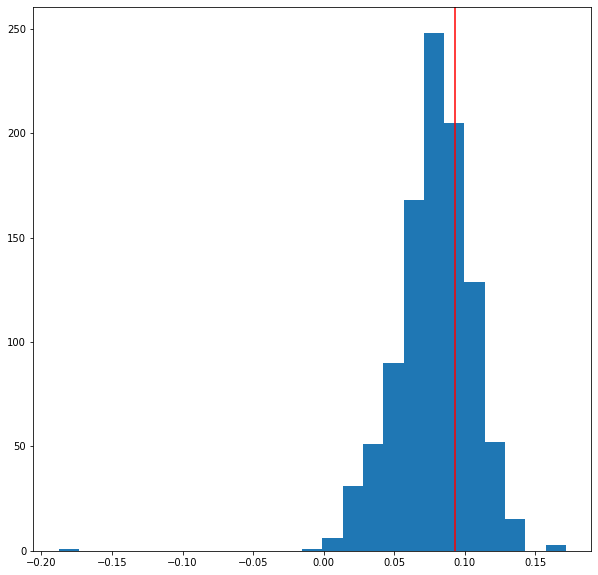

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.hist(x=means,bins=25)
ax.axvline(x=np.mean(in_years.pct_change()), color='r')
